# Assignment 1
Raghav Juyal\
EP20BTECH11018

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import astropy as ap
import astroML.stats as aml
import pandas as pd

# Question 1
Create 1000 draws from a normal distribution of mean of 1.5 and standard deviation of 0.5.\
Plot the pdf. Calculate the sample mean, variance, skewness, kurtosis as well as standard\
deviation using MAD and of these samples.

Sample Mean: 1.510
Sample Variance: 0.240
Skewness: 0.117
Kurtosis: 0.066
MAD: 0.323
Standard Deviation: 0.479
sigma_G: 0.480


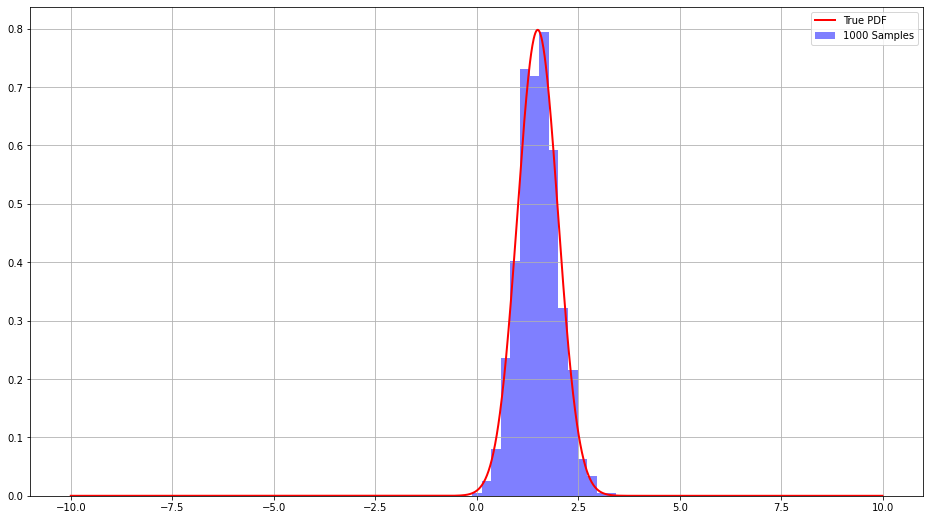

In [5]:
np.random.seed(42)
obj = st.norm(1.5, 0.5)
rv = obj.rvs(size=1000)
print(f"Sample Mean: {rv.mean():.3f}")
print(f"Sample Variance: {float(rv.var()*1000/999.0):.3f}")
print(f"Skewness: {st.skew(rv):.3f}")
print(f"Kurtosis: {st.kurtosis(rv):.3f}")
print(f"MAD: {st.median_abs_deviation(rv):.3f}")
print(f"Standard Deviation: {(1.482*st.median_abs_deviation(rv)):.3f}")
print(f"sigma_G: {aml.sigmaG(rv):.3f}")
plt.figure(figsize=(16, 9))
plt.plot(np.arange(-10, 10, 0.01), obj.pdf(np.arange(-10, 10, 0.01)), c='r', lw=2,label='True PDF')
plt.grid()
plt.hist(rv, bins=15, density=True, alpha=0.5, color='b', label='1000 Samples')
plt.legend()
plt.show()

# Question 2
Plot a Cauchy distribution with μ=0 and γ=1.5 superposed on the top of a Gaussian
distribution with μ=0 and σ=1.5.\
 Use two different line styles to distinguish between the
Gaussan and Cauchy distribution on the plot and also indicate these in the legends.

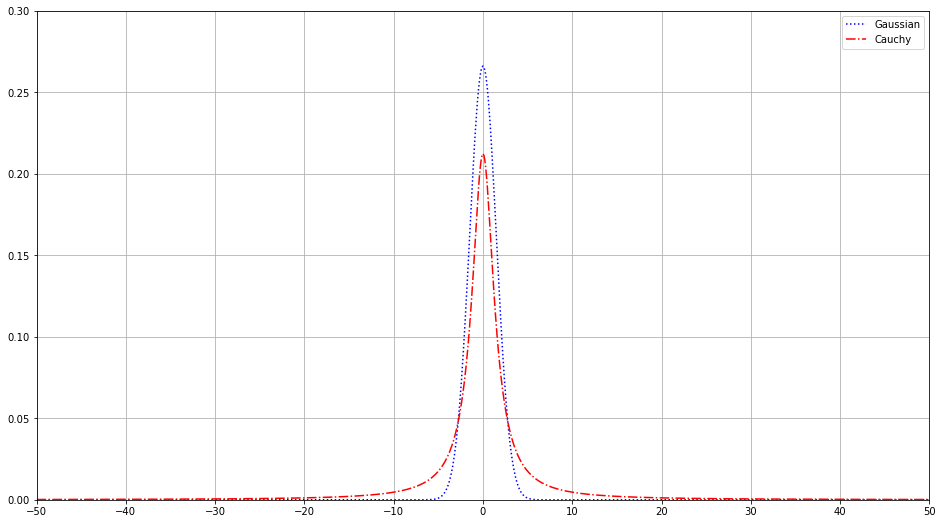

In [6]:
pdf_cauchy = st.cauchy(0, 1.5).pdf(np.arange(-50, 50, 0.1)) # Cauchy PDF
pdf_gaussian = st.norm(0, 1.5).pdf(np.arange(-50, 50, 0.1)) # Gaussian PDF
plt.figure(figsize=(16, 9))
# Gaussian Plot
plt.plot(np.arange(-50, 50, 0.1), pdf_gaussian, label="Gaussian", color='b', ls =':')
# Cauchy Plot
plt.plot(np.arange(-50, 50, 0.1), pdf_cauchy, label="Cauchy", color='r', ls = '-.')
plt.grid(which='both')
plt.ylim(0, 0.3)
plt.xlim(-50, 50)
plt.xticks(np.arange(-50, 51, 10))
plt.legend()
plt.show()

# Question 3
Plot Poisson distribution with mean of 5, superposed on top of a Gaussian distribution with
mean of 5 and standard deviation of square root of 5.\
 Use two different line styles for the
two distributions and make sure the plot contains legends for both of them.

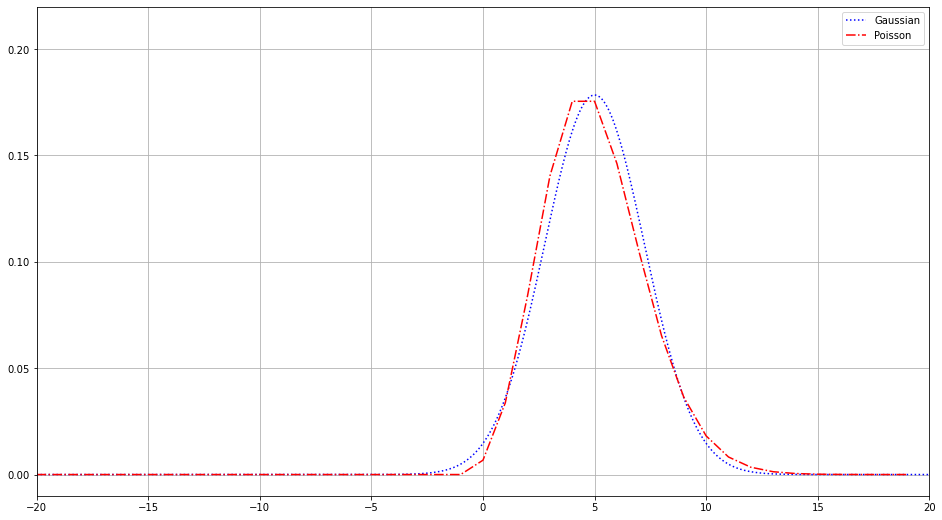

In [8]:
pdf_poisson = st.poisson(5).pmf(np.arange(-20, 20, 1)) # Poisson PDF
pdf_gaussian = st.norm(5, np.sqrt(5)).pdf(np.arange(-20, 20, 0.01)) # Gaussian PD
plt.figure(figsize=(16, 9))
# Gaussian Plot
plt.plot(np.arange(-20, 20, 0.01), pdf_gaussian, label="Gaussian", color='b', ls =':')
# Poisson Plot
plt.plot(np.arange(-20, 20, 1), pdf_poisson, label="Poisson", color='r', ls = '-.')
plt.grid(which='both')
plt.ylim(-0.01, 0.22)
plt.xlim(-20, 20)
plt.legend()
plt.show()

# Question 4
The following were the measurements of mean lifetime of K meson (as of 1990) (in units of
10−10 s) :\
 0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958±
0.00045.\
 Calculate the weighted mean lifetime and uncertainty of the mean.

In [9]:
lifetime = np.asfarray([0.892, 0.881, 0.8913, 0.9837, 0.8958])
error = np.asfarray([0.00044, 0.009, 0.00032, 0.00048, 0.00045])
weighted_mean = np.sum(np.divide(lifetime, np.square(error)))/np.sum(np.divide(1, np.square(error)))
uncertainity = 1/np.sqrt(np.sum(np.divide(1, np.square(error))))
print(f"Weighted Mean: {weighted_mean:.3f}")
print(f"Uncertainity of Weighted Mean: {uncertainity:.3f}")

Weighted Mean: 0.909
Uncertainity of Weighted Mean: 0.000


# Question 5
Download the eccentricity distribution of exoplanets from the exoplanet catalog
http://exoplanet.eu/catalog/.\
Look for the column titled e, which denotes the eccentricity.
Draw the histogram of this distribution.\
Then redraw the same histogram after Gaussianizing the distribution using Box-transformation either using scipy.stats.boxcox\
or from first principles using the equations shown in class or in arXiv:1508.00931.\
Note that exoplanets without eccentricity data or withe e=0, can be ignored.

In [10]:
# Reading data
df = pd.read_csv("exoplanet.eu_catalog.csv")
print(df['eccentricity'].count())

2145


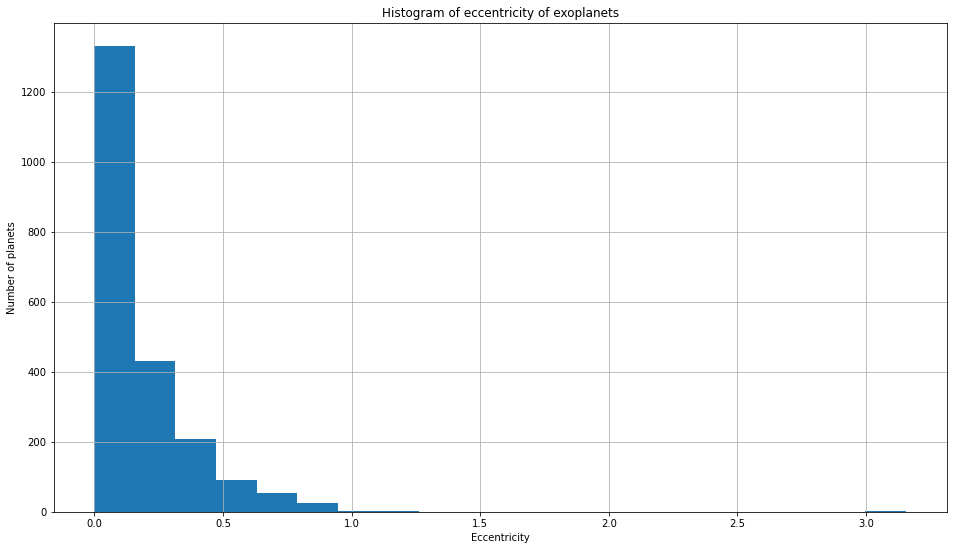

In [11]:
# Plotting original data
plt.figure(figsize=(16, 9))
plt.hist(df['eccentricity'], bins=20)
plt.grid(which='both')
plt.xlabel("Eccentricity")
plt.ylabel("Number of planets")
plt.title("Histogram of eccentricity of exoplanets")
plt.show()

In [14]:
# Removing data with e=0
for x in df.index:
    if not(df.loc[x, "eccentricity"] > 0):
        df.drop(x, inplace = True)
print(df['eccentricity'].count())

1704


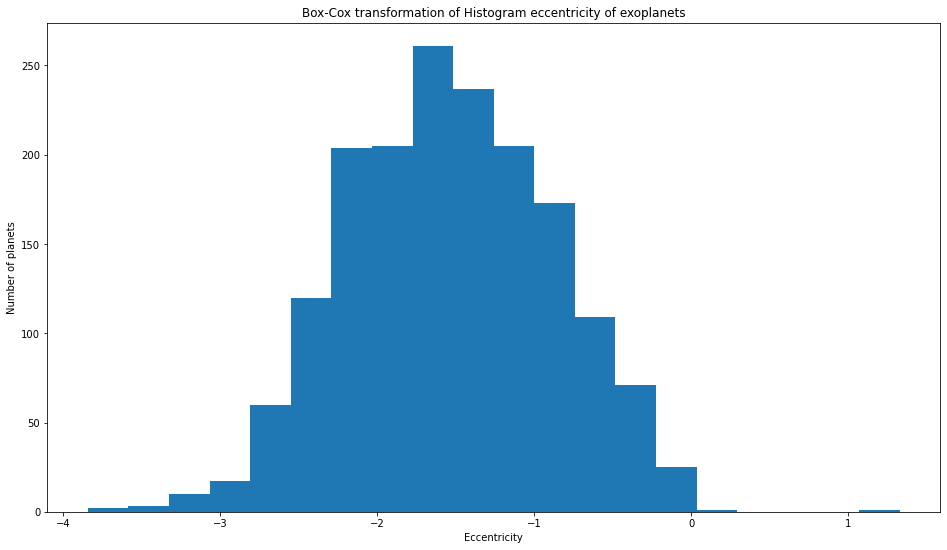

In [15]:
# Plotting Gaussianized data(Using Box-Cox transformation)
plt.figure(figsize=(16, 9))
plt.hist(st.boxcox(df['eccentricity'])[0], bins=20)
plt.xlabel("Eccentricity")
plt.ylabel("Number of planets")
plt.title("Box-Cox transformation of Histogram eccentricity of exoplanets")
plt.show()